In [1]:
import numpy as np
import matplotlib.pyplot as plt

Niepewność położenia u(u): 0.058 u

--- Obliczone niepewności złożone dla punktów kalibracyjnych ---
------------------------------------------------------------
Położenie u [u]      | Długość fali λ [nm]  | Niepewność u_c(λ) [nm]
------------------------------------------------------------
2.0                  | 706.5                | 14.99               
2.7                  | 667.8                | 11.83               
3.4                  | 587.6                | 10.75               
7.5                  | 501.6                | 12.53               
8.0                  | 492.2                | 11.70               
9.0                  | 471.3                | 9.87                
10.5                 | 447.2                | 11.81               
11.2                 | 438.8                | 16.15               
------------------------------------------------------------


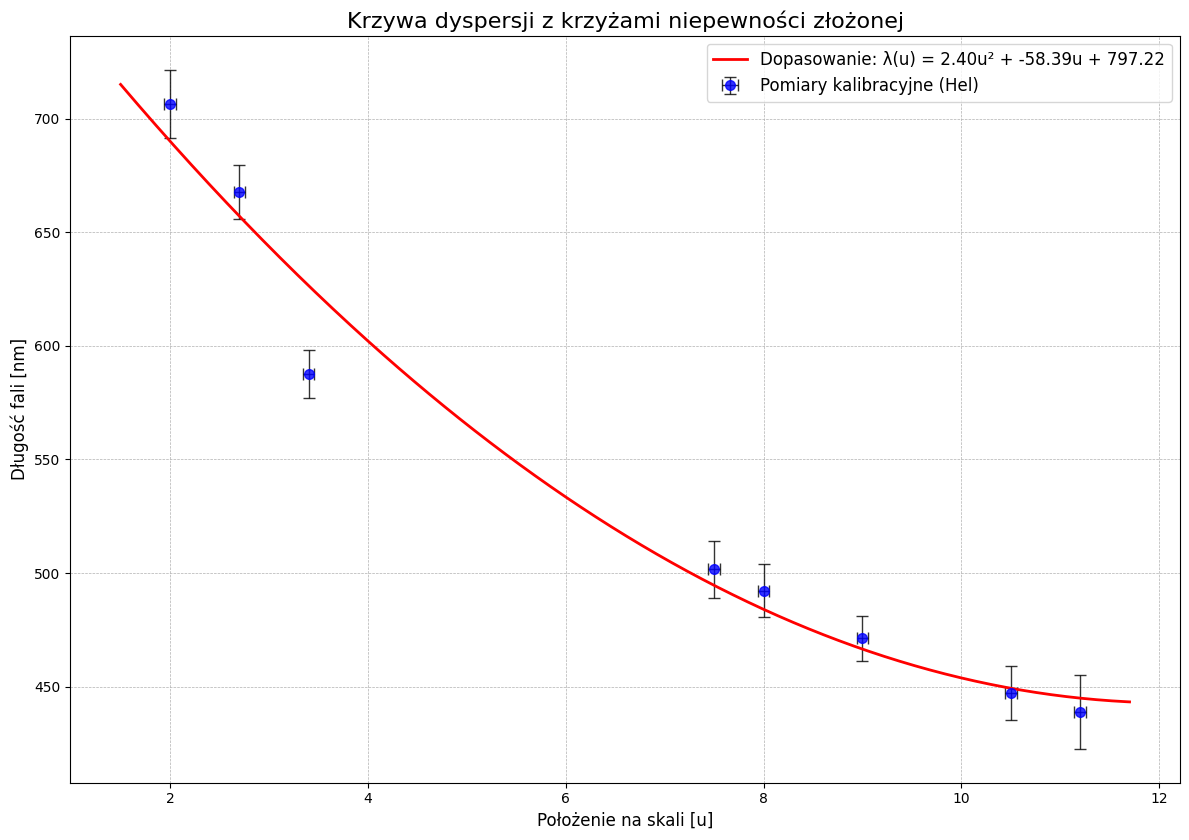

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- DANE ---
# Dane kalibracyjne dla Helu
position_dispersion = np.array([2.0, 2.7, 3.4, 7.5, 8.0, 9.0, 10.5, 11.2])
wavelength = np.array([706.5, 667.8, 587.6, 501.6, 492.2, 471.3, 447.2, 438.8])

# --- OBLICZENIE NIEPEWNOŚCI SKŁADOWYCH ---

# 1. Niepewność położenia u(u) dla osi X
d_u = 0.1
a_u = d_u
u_uncertainty = a_u / np.sqrt(3)

print(f"Niepewność położenia u(u): {u_uncertainty:.3f} u")

# --- DOPASOWANIE WIELOMIANU ---
deg = 2
coeffs, cov_matrix = np.polyfit(position_dispersion, wavelength, deg=deg, cov=True)
a_fit, b_fit, c_fit = coeffs

# --- OBLICZENIE NIEPEWNOŚCI ZŁOŻONEJ DLA KAŻDEGO PUNKTU ---
u_c_lambda_points = []
for u_val in position_dispersion:
    # Składowa od dopasowania modelu
    T = np.array([u_val**2, u_val**1, u_val**0])
    variance_fit = T @ cov_matrix @ T.T

    # Składowa od pomiaru położenia u(u)
    derivative = 2 * a_fit * u_val + b_fit
    variance_measurement = (derivative * u_uncertainty) ** 2

    # Całkowita niepewność złożona dla danego punktu
    u_c = np.sqrt(variance_fit + variance_measurement)
    u_c_lambda_points.append(u_c)

u_c_lambda_points = np.array(u_c_lambda_points)

# --- WYŚWIETLENIE TABELI Z NIEPEWNOŚCIAMI ---
print("\n--- Obliczone niepewności złożone dla punktów kalibracyjnych ---")
print("-" * 60)
print(
    f"{'Położenie u [u]':<20} | {'Długość fali λ [nm]':<20} | {'Niepewność u_c(λ) [nm]':<20}"
)
print("-" * 60)
for i in range(len(position_dispersion)):
    print(
        f"{position_dispersion[i]:<20.1f} | {wavelength[i]:<20.1f} | {u_c_lambda_points[i]:<20.2f}"
    )
print("-" * 60)


# --- TWORZENIE WYKRESU ---
plt.figure(figsize=(12, 8.5))

# 1. Rysowanie punktów pomiarowych z KRZYŻAMI NIEPEWNOŚCI
# yerr jest teraz tablicą obliczonych niepewności złożonych
plt.errorbar(
    position_dispersion,
    wavelength,
    xerr=u_uncertainty,
    yerr=u_c_lambda_points,
    fmt="o",
    color="blue",
    ecolor="black",
    capsize=4,
    label="Pomiary kalibracyjne (Hel)",
    alpha=0.8,
    markersize=7,
    elinewidth=1,
)

# 2. Rysowanie dopasowanej krzywej
u_fit = np.linspace(
    position_dispersion.min() - 0.5, position_dispersion.max() + 0.5, 400
)
wav_fit = np.polyval(coeffs, u_fit)

plt.plot(
    u_fit,
    wav_fit,
    color="red",
    linewidth=2.0,
    label=f"Dopasowanie: λ(u) = {a_fit:.2f}u² + {b_fit:.2f}u + {c_fit:.2f}",
)

# --- USTAWIENIA WYKRESU ---
plt.legend(fontsize=12)
plt.xlabel("Położenie na skali [u]", fontsize=12)
plt.ylabel("Długość fali [nm]", fontsize=12)
plt.title("Krzywa dyspersji z krzyżami niepewności złożonej", fontsize=16)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

In [4]:
def lambda_u(u):
    u = np.asarray(u, dtype=float)
    return a * u**2 + b * u + c


# Positions [u] from report tables (unknown elements)
# fmt: off
positions_unknown_1 = np.array([2.5, 3.6, 5.6, 9.0])
positions_unknown_2 = np.array( [ 0.0, 0.1, 0.7, 1.0, 1.5, 1.7, 2.0, 2.8, 3.0, 3.4, 4.5, 6.8, 8.0, 8.4, 9.4, 10.3, 10.6, ])
# fmt: on
positions_unknown_3 = np.array([1.1, 1.8, 2.4, 3.8, 4.9, 6.8])

wavelength_unknown_1 = lambda_u(positions_unknown_1)
wavelength_unknown_2 = lambda_u(positions_unknown_2)
wavelength_unknown_3 = lambda_u(positions_unknown_3)

# Round to 0.1 nm for presentation
wavelength_unknown_1_rounded = np.round(wavelength_unknown_1, 1)
wavelength_unknown_2_rounded = np.round(wavelength_unknown_2, 1)
wavelength_unknown_3_rounded = np.round(wavelength_unknown_3, 1)

print("Unknown element 1:")
print("u [u]:\n", positions_unknown_1)
print("lambda [nm]:\n", wavelength_unknown_1_rounded)
print()
print("Unknown element 2:")
print("u [u]:\n", positions_unknown_2)
print("lambda [nm]:\n", wavelength_unknown_2_rounded)
print()
print("Unknown element 3:")
print("u [u]:\n", positions_unknown_3)
print("lambda [nm]:\n", wavelength_unknown_3_rounded)

Unknown element 1:
u [u]:
 [2.5 3.6 5.6 9. ]
lambda [nm]:
 [666.3 618.2 545.7 466.5]

Unknown element 2:
u [u]:
 [ 0.   0.1  0.7  1.   1.5  1.7  2.   2.8  3.   3.4  4.5  6.8  8.   8.4
  9.4 10.3 10.6]
lambda [nm]:
 [797.2 791.4 757.5 741.2 715.  704.9 690.1 652.6 643.7 626.5 583.2 511.4
 484.  476.4 460.9 451.  448.5]

Unknown element 3:
u [u]:
 [1.1 1.8 2.4 3.8 4.9 6.8]
lambda [nm]:
 [735.9 699.9 670.9 610.1 568.9 511.4]


In [5]:
import numpy as np

# --- KROK 1: Definicja DOKŁADNYCH danych kalibracyjnych dla Helu ---
# Dane pochodzą z Tabeli 8 Twojego sprawozdania.
positions_helium = np.array([2.0, 2.7, 3.4, 7.5, 8.0, 9.0, 10.5, 11.2])
wavelengths_helium = np.array([706.5, 667.8, 587.6, 501.6, 492.2, 471.3, 447.2, 438.8])

print("--- Użyte dane wejściowe do dopasowania (Widmo Helu) ---")
print(f"Położenia [u]: {positions_helium}")
print(f"Długości fal [nm]: {wavelengths_helium}")
print("\n" + "=" * 50 + "\n")

# --- KROK 2: Dopasowanie wielomianu 2. stopnia i obliczenie niepewności ---
# Funkcja polyfit jest wywoływana TYLKO na powyższych danych.
coeffs, cov_matrix = np.polyfit(positions_helium, wavelengths_helium, deg=2, cov=True)
coeffs

--- Użyte dane wejściowe do dopasowania (Widmo Helu) ---
Położenia [u]: [ 2.   2.7  3.4  7.5  8.   9.  10.5 11.2]
Długości fal [nm]: [706.5 667.8 587.6 501.6 492.2 471.3 447.2 438.8]




array([  2.40495355, -58.38891728, 797.21807666])